# Import Libraries

In [1]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("bank-full.csv",sep=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
required_column = ['age', 'balance', 'duration', 'campaign', 'y']
data_df = data[required_column]

In [7]:
data_df.head()

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no


# EDA

In [11]:
data_df.info

<bound method DataFrame.info of        age  balance  duration  campaign    y
0       58     2143       261         1   no
1       44       29       151         1   no
2       33        2        76         1   no
3       47     1506        92         1   no
4       33        1       198         1   no
...    ...      ...       ...       ...  ...
45206   51      825       977         3  yes
45207   71     1729       456         2  yes
45208   72     5715      1127         5  yes
45209   57      668       508         4   no
45210   37     2971       361         2   no

[45211 rows x 5 columns]>

In [12]:
data_df.isnull().sum()

age         0
balance     0
duration    0
campaign    0
y           0
dtype: int64

<AxesSubplot:xlabel='age'>

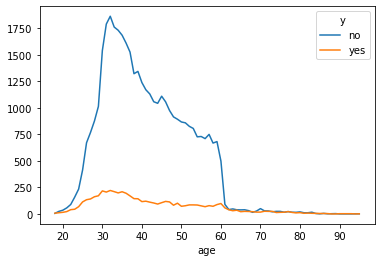

In [13]:
pd.crosstab(data_df.age,data_df.y).plot(kind="line")

<AxesSubplot:>

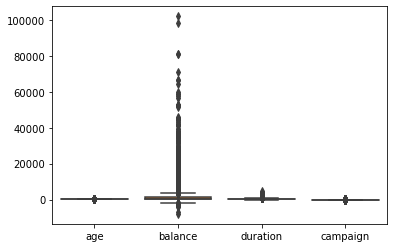

In [14]:
sb.boxplot(data =data_df,orient = "v")

# Select features and target

In [16]:
x = data_df.drop('y',axis=1)
y = data_df['y']

# train test spliting

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=100)

In [20]:
X_train

,age,balance,duration,campaign
40942,43,451,289,2
31338,61,5157,432,1
39943,30,942,146,2
4413,32,137,13,12
591,38,581,79,1
...,...,...,...,...
16304,25,937,115,1
79,55,1,208,1
12119,54,1033,152,3
14147,44,71,251,2


# Model creation

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

# Prediction

In [23]:
y_pred = model.predict(X_test)

In [24]:
pd.DataFrame({"Actual":y_test,"Prediction":y_pred})

,Actual,Prediction
14789,no,no
8968,no,no
34685,no,no
2369,no,no
36561,no,no
...,...,...
38643,no,no
11015,no,no
4443,no,no
33970,no,no


# Accuracy testing (confusion matrix)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [26]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[9826,  168],
       [1101,  208]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.8877289215252587

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94      9994
         yes       0.55      0.16      0.25      1309

    accuracy                           0.89     11303
   macro avg       0.73      0.57      0.59     11303
weighted avg       0.86      0.89      0.86     11303



# User testing

In [34]:
data_df.head()

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no


In [41]:
data_new= {"age":9,"balance":1452,"duration":93,"campaign":1}

In [42]:
def user_testing(data):
    new = pd.DataFrame(data_new,index=[0])
    result = model.predict(new)[0]
    if result==0:
        print("not subscribed !!!")
    else:
        print("subscribed !!")

In [43]:
user_testing(data)

subscribed !!
